In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('mcdonalds.csv')

In [ ]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [ ]:
df_subset = df.iloc[:, :11]

In [ ]:
df_binary = df_subset.replace({'Yes': 1, 'No': 0})


In [ ]:
column_means = df_binary.mean()

In [ ]:
rounded_means = column_means.round(2)
rounded_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(df_binary)

In [ ]:
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
std_deviation = np.sqrt(explained_variance)

# Create a DataFrame for the summary
summary_df = pd.DataFrame({
    'Standard Deviation': std_deviation,
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_explained_variance_ratio
}, index=[f'PC{i+1}' for i in range(len(explained_variance))])

# Print the summary
print("Importance of components:")
print(summary_df.round(4))


Importance of components:
      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1               0.7570                  0.2994                 0.2994
PC2               0.6075                  0.1928                 0.4922
PC3               0.5046                  0.1330                 0.6253
PC4               0.3988                  0.0831                 0.7084
PC5               0.3374                  0.0595                 0.7679
PC6               0.3103                  0.0503                 0.8182
PC7               0.2897                  0.0438                 0.8620
PC8               0.2751                  0.0395                 0.9016
PC9               0.2653                  0.0368                 0.9383
PC10              0.2488                  0.0324                 0.9707
PC11              0.2369                  0.0293                 1.0000


In [ ]:
print(summary_df.round(1))

      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1                  0.8                     0.3                    0.3
PC2                  0.6                     0.2                    0.5
PC3                  0.5                     0.1                    0.6
PC4                  0.4                     0.1                    0.7
PC5                  0.3                     0.1                    0.8
PC6                  0.3                     0.1                    0.8
PC7                  0.3                     0.0                    0.9
PC8                  0.3                     0.0                    0.9
PC9                  0.3                     0.0                    0.9
PC10                 0.2                     0.0                    1.0
PC11                 0.2                     0.0                    1.0


In [ ]:
# Get the loadings (components)
loadings = pca.components_

# Transpose to match the (n x k) = (11 x 11) shape
loadings_df = pd.DataFrame(loadings.T, index=df_binary.columns,
                           columns=[f'PC{i+1}' for i in range(loadings.shape[0])])

In [ ]:
# Print the loadings matrix
print("Rotation (n x k) = (11 x 11):")
print(loadings_df.round(3))

Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 -0.211 -0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110 

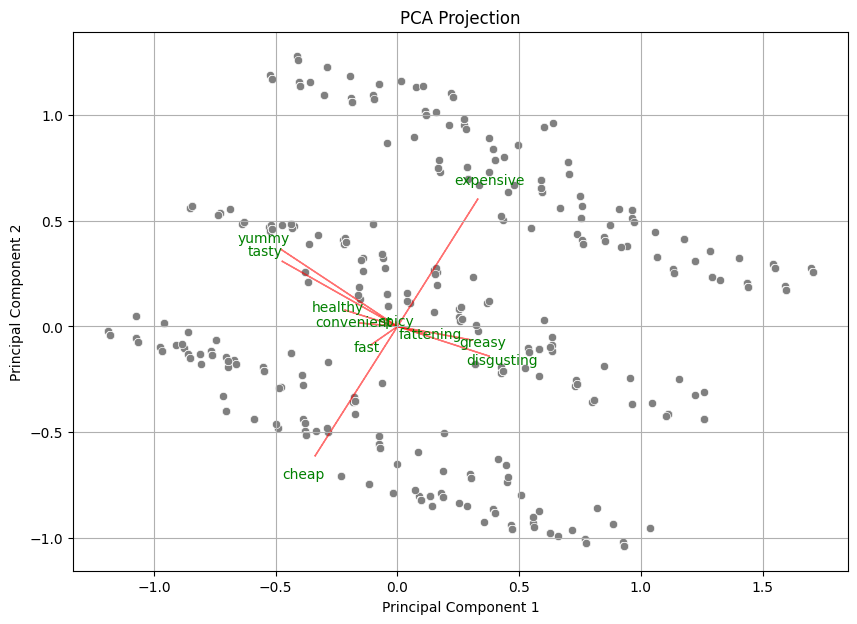

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pc_df, color='grey')

# Add projection axes (loadings)
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x * 1.15, y * 1.15, df_binary.columns[i], color='g', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid()
plt.show()

In [ ]:
np.random.seed(1234)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to relabel clusters consistently
def relabel_clusters(labels):
    unique_labels = np.unique(labels)
    new_labels = np.zeros_like(labels)
    for i, unique_label in enumerate(unique_labels):
        new_labels[labels == unique_label] = i
    return new_labels

# Perform k-means clustering for a range of cluster numbers
best_kmeans = None
best_score = -1
best_n_clusters = 0
wcss = []

for n_clusters in range(2, 9):
    kmeans_models = []
    scores = []

    for _ in range(10):  # nrep = 10
        kmeans = KMeans(n_clusters=n_clusters, random_state=None, n_init = 10).fit(df_binary)
        kmeans_models.append(kmeans)
        score = silhouette_score(df_binary, kmeans.labels_)
        scores.append(score)

    avg_score = np.mean(scores)
    # Calculate WCSS
    wcss.append(kmeans.inertia_)


    if avg_score > best_score:
        best_score = avg_score
        best_kmeans = kmeans_models[np.argmax(scores)]
        best_n_clusters = n_clusters




In [ ]:
# Relabel clusters for consistency
best_kmeans.labels_ = relabel_clusters(best_kmeans.labels_)

print(f'Best number of clusters: {best_n_clusters}')
print(f'Silhouette score: {best_score}')

Best number of clusters: 8
Silhouette score: 0.28857316352982865


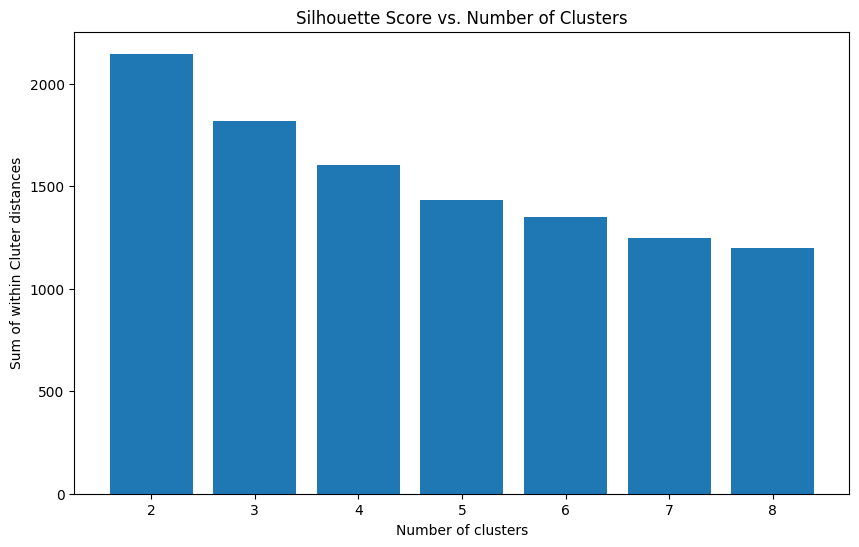

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(2, 9),height= wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of within Cluter distances')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample


# Define a function to perform bootstrapped k-means clustering and calculate ARI
def bootstrapped_kmeans_ari(data, n_clusters, n_boot=100, n_rep=10):
    aris = []
    for _ in range(n_boot):
        # Create a bootstrap sample
        boot_sample = resample(data, n_samples=len(data), random_state=None)

        # Cluster the original data and the bootstrap sample
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=None)
        kmeans.fit(data)
        labels_orig = kmeans.labels_

        kmeans_boot = KMeans(n_clusters=n_clusters, n_init=10, random_state=None)
        kmeans_boot.fit(boot_sample)
        labels_boot = kmeans_boot.predict(data)

        # Calculate the Adjusted Rand Index
        ari = adjusted_rand_score(labels_orig, labels_boot)
        aris.append(ari)

    return aris


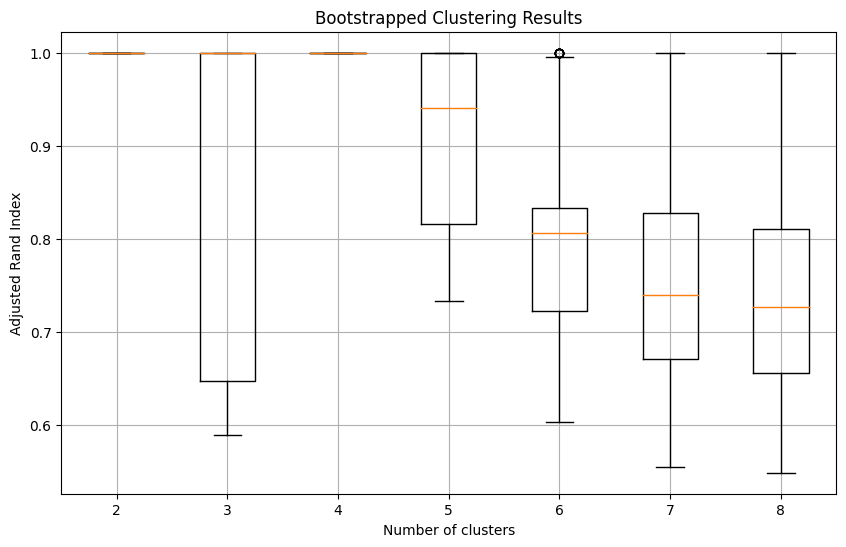

In [ ]:
# Perform bootstrapped clustering for a range of cluster numbers
n_clusters_range = range(2, 9)
ari_data = []

for n_clusters in n_clusters_range:
    aris = bootstrapped_kmeans_ari(df_binary, n_clusters, n_boot=100, n_rep=10)
    ari_data.append(aris)

# Create boxplots to visualize the distribution of ARI for each number of clusters
plt.figure(figsize=(10, 6))
plt.boxplot(ari_data, labels=list(n_clusters_range))
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrapped Clustering Results')
plt.grid(True)
plt.show()

In [ ]:
# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(df_binary)

# Get the cluster assignments
labels = kmeans.labels_

# Add the cluster assignments to the DataFrame
df_binary['Cluster'] = labels

# Prepare the data for plotting
cluster_means = df_binary.groupby('Cluster').mean()


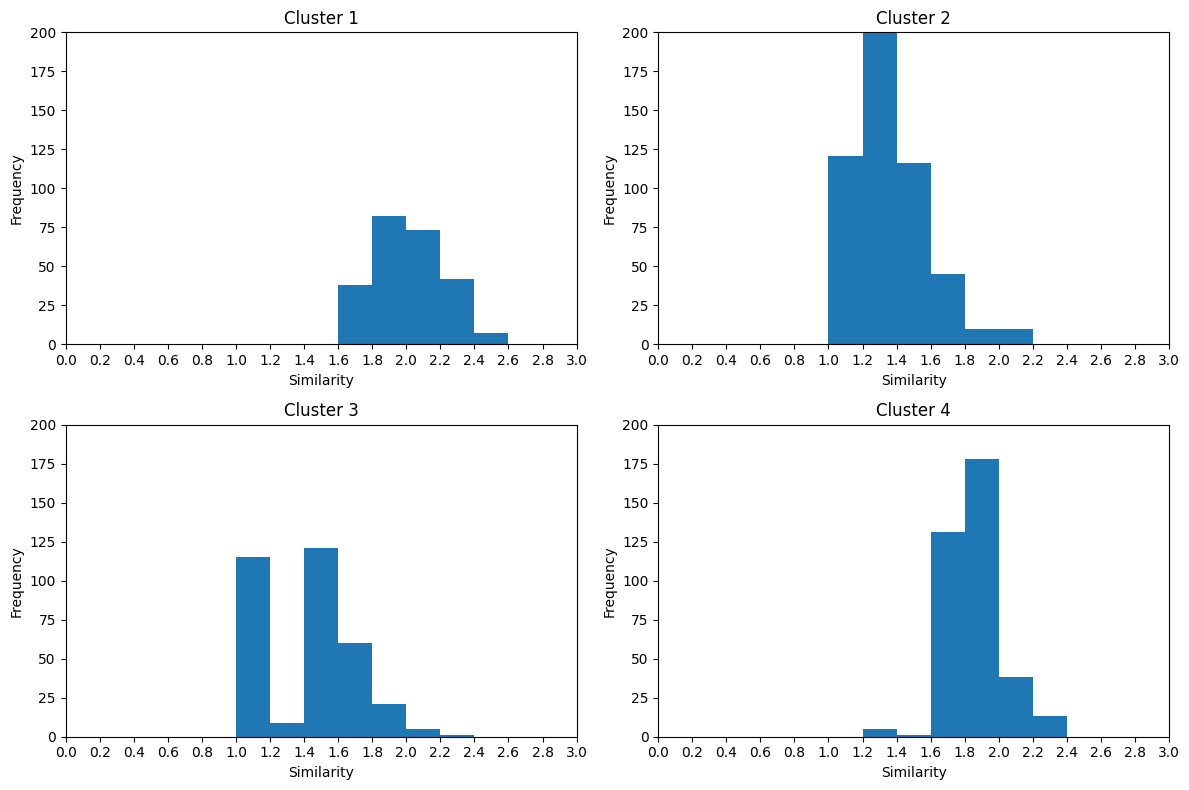

In [ ]:
# Define parameters for histogram
range_values = (1, 3)
num_bins = 10
max_frequency = 200

# Initialize subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop over clusters and plot histograms
for i in range(1, 5):
    # Extract cluster labels and calculate similarities
    similarities = kmeans.transform(df_binary).min(axis=1)
    cluster_indices = np.where(labels == i - 1)[0]
    cluster_similarities = similarities[cluster_indices]

    # Determine subplot position
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Plot histogram
    axs[row, col].hist(cluster_similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Cluster {i}')

    # Set limits and ticks
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0,1.20,1.40,1.60,1.80,2.0,2.20,2.40,2.60,2.80,3.0])

# Adjust layout
plt.tight_layout()
plt.show()

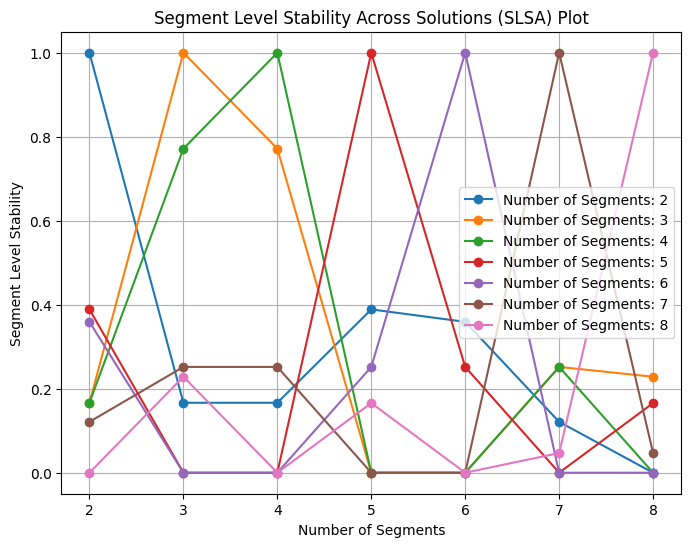

In [ ]:
# Perform K-means clustering for different numbers of segments
num_segments = range(2, 9)
segment_stability = []

for n_clusters in num_segments:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(df_binary)
    segment_stability.append(labels)

# Plot SLSA
plt.figure(figsize=(8, 6))
for i, segment_labels in enumerate(segment_stability):
    plt.plot(num_segments, [np.mean(segment_labels == labels) for labels in segment_stability], marker='o', label=f'Number of Segments: {i+2}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

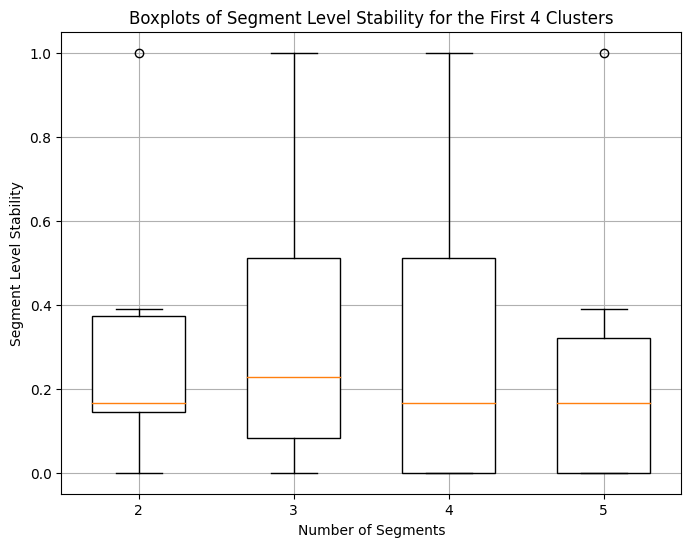

In [ ]:
# Plot SLSA
plt.figure(figsize=(8, 6))
for i, segment_labels in enumerate(segment_stability[:4]):  # Take only the first 4 clusters
    plt.boxplot([np.mean(segment_labels == labels) for labels in segment_stability], positions=[i+2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='white'))

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Boxplots of Segment Level Stability for the First 4 Clusters')
plt.xticks(num_segments[:4])
plt.grid(True)

plt.show()

In [ ]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(df_binary.values)
    iter_val = model.n_iter_
    converged = True  # KMeans algorithm always converges
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_  # Negative of inertia is the log likelihood
    n_samples, _ = df_binary.shape
    aic = -2 * log_likelihood + 2 * k  # AIC calculation
    bic = -2 * log_likelihood + np.log(n_samples) * k  # BIC calculation
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy  # ICL calculation

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Convert to DataFrame
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     2       True  2   2 -3023.568766  6051.137532  6061.700303  6061.135898
1     4       True  3   3 -2118.512724  4243.025448  4258.869605  4257.908540
2     4       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3     4       True  5   5 -1463.619492  2937.238984  2963.645912  2962.059412
4     5       True  6   6 -1371.252067  2754.504133  2786.192447  2784.449968
5     4       True  7   7 -1281.092844  2576.185689  2613.155388  2611.261060
6     7       True  8   8 -1228.694191  2473.388381  2515.639466  2513.665382


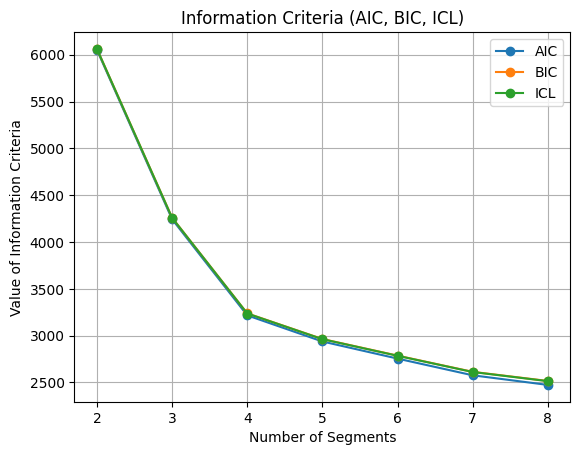

In [ ]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(df_binary)
kmeans_clusters = kmeans.predict(df_binary)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(df_binary)
gmm_clusters = gmm.predict(df_binary)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = df_binary[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture    0    1    2    3
kmeans                     
0        242    0    0    0
1          0  513    0    0
2          0    0  366    0
3          0    0    0  332
kmeans   0   1   2   3
kmeans                
0       13   6  27   6
1       22  18  64  11
2       28  18  33  10
3       25  11  32   8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(df_binary)

log_likelihood_m4a = gmm_m4a.score(df_binary)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(df_binary)

log_likelihood_m4 = gmm_m4.score(df_binary)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 3.753398585201818
Log-likelihood for MD.m4: 3.753398585201818


In [ ]:
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [ ]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)


like_n_counts = df['Like.n'].value_counts()


print(like_n_counts)

Like.n
 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64


In [ ]:
from patsy import dmatrices

independent_vars = df.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [ ]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


In [ ]:
from patsy import dmatrix
import statsmodels.api as sm
from scipy.stats import norm

# Get the model summary in a structured way
def get_gmm_summary(model, X):
    means = model.means_
    covariances = model.covariances_

    summaries = []
    for comp_idx in range(means.shape[0]):
        estimates = means[comp_idx]
        std_errors = np.sqrt(np.diag(covariances[comp_idx]))
        z_values = estimates / std_errors
        p_values = 2 * (1 - norm.cdf(np.abs(z_values)))

        summary = pd.DataFrame({
            'Estimate': estimates,
            'Std. Error': std_errors,
            'z value': z_values,
            'Pr(>|z|)': p_values
        })
        summaries.append(summary)
    return summaries

# Get the summary for each component
summaries = get_gmm_summary(model, X)

# Print the summaries
for idx, summary in enumerate(summaries):
    print(f"Component {idx + 1} Summary:")
    print(summary)
    print("Significance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '' 1\n")


Component 1 Summary:
    Estimate  Std. Error      z value  Pr(>|z|)
0   1.000000    0.001000  1000.000000  0.000000
1   0.279915    0.448958     0.623476  0.532972
2   0.713675    0.452044     1.578773  0.114388
3   0.096154    0.294804     0.326162  0.744302
4   0.903846    0.294804     3.065924  0.002170
5   0.722222    0.447904     1.612448  0.106865
6   0.690171    0.462424     1.492507  0.135566
7   0.457265    0.498171     0.917887  0.358678
8   0.365385    0.481539     0.758785  0.447981
9   0.525641    0.499343     1.052665  0.292495
10  0.106838    0.308908     0.345855  0.729451
11  0.754274    0.430518     1.752013  0.079772
Significance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '' 1

Component 2 Summary:
    Estimate  Std. Error      z value  Pr(>|z|)
0   1.000000    0.001000  1000.000000  0.000000
1   0.682234    0.465609     1.465249  0.142853
2   1.000000    0.001000  1000.000000  0.000000
3   0.092386    0.289571     0.319043  0.749694
4   0.849746    0.357321   

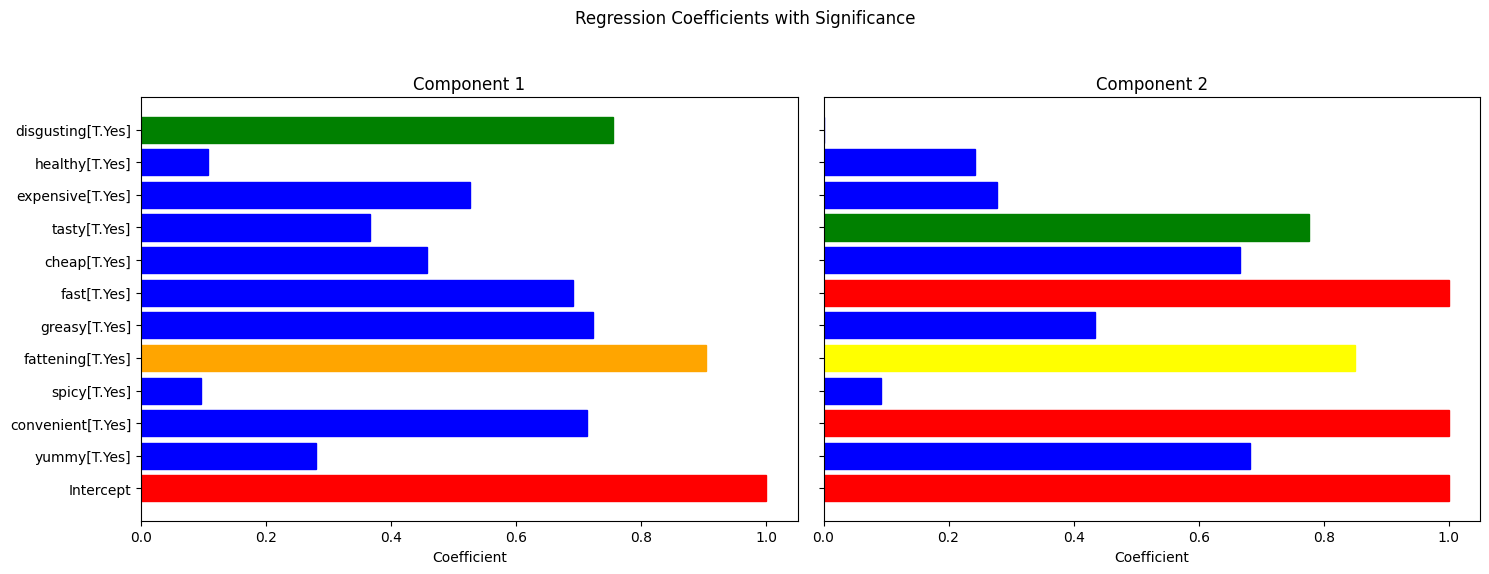

In [ ]:
# Function to plot the regression coefficients with significance
def plot_coefficients_with_significance(summaries, X):
    num_components = len(summaries)
    num_vars = summaries[0].shape[0]

    fig, axs = plt.subplots(1, num_components, figsize=(15, 6), sharey=True)

    for idx, summary in enumerate(summaries):
        ax = axs[idx]
        estimates = summary['Estimate']
        p_values = summary['Pr(>|z|)']

        bars = ax.barh(range(num_vars), estimates, color='blue', edgecolor='black')

        for bar, p_value in zip(bars, p_values):
            if p_value < 0.001:
                bar.set_color('red')
            elif p_value < 0.01:
                bar.set_color('orange')
            elif p_value < 0.05:
                bar.set_color('yellow')
            elif p_value < 0.1:
                bar.set_color('green')
            else:
                bar.set_color('blue')

        ax.set_yticks(range(num_vars))
        ax.set_yticklabels(X.design_info.column_names)
        ax.set_title(f'Component {idx + 1}')
        ax.set_xlabel('Coefficient')

    plt.suptitle('Regression Coefficients with Significance')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot the coefficients with significance
plot_coefficients_with_significance(summaries, X)

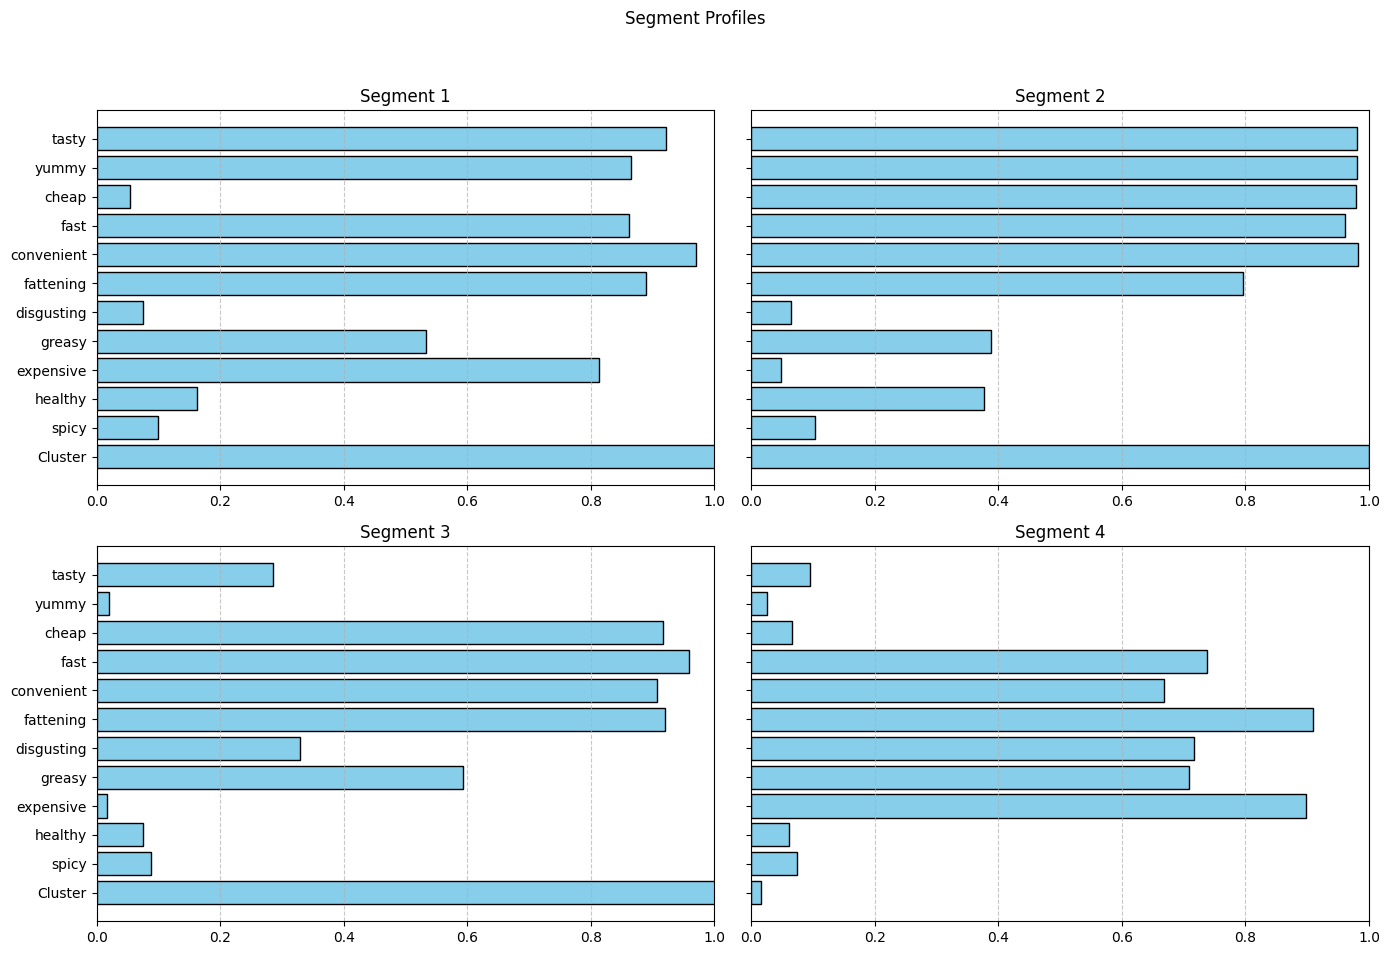

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

# Assuming df_binary is your preprocessed dataset
# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(df_binary)

# Perform k-means clustering with 4 segments
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
segment_labels = kmeans.fit_predict(MD_x_scaled)

# Add segment labels to the dataframe
segment_profiles = pd.DataFrame(df_binary)
segment_profiles['Segment'] = segment_labels

# Calculate the mean profile for each segment
mean_profiles = segment_profiles.groupby('Segment').mean()

# Perform hierarchical clustering on attributes
distance_matrix = pdist(mean_profiles.T, metric='euclidean')
hc = linkage(distance_matrix, method='ward')

# Get the order of attributes from hierarchical clustering
dendro = dendrogram(hc, labels=mean_profiles.columns, no_plot=True)
ordered_attributes = dendro['ivl']

# Plot the segment profiles
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

for i, (ax, segment) in enumerate(zip(axs.flatten(), mean_profiles.index)):
    profile = mean_profiles.loc[segment, ordered_attributes]
    bars = ax.barh(range(len(ordered_attributes)), profile, color='skyblue', edgecolor='black')
    ax.set_yticks(range(len(ordered_attributes)))
    ax.set_yticklabels(ordered_attributes)
    ax.set_title(f'Segment {segment + 1}')
    ax.set_xlim(0, 1)
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.suptitle('Segment Profiles')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


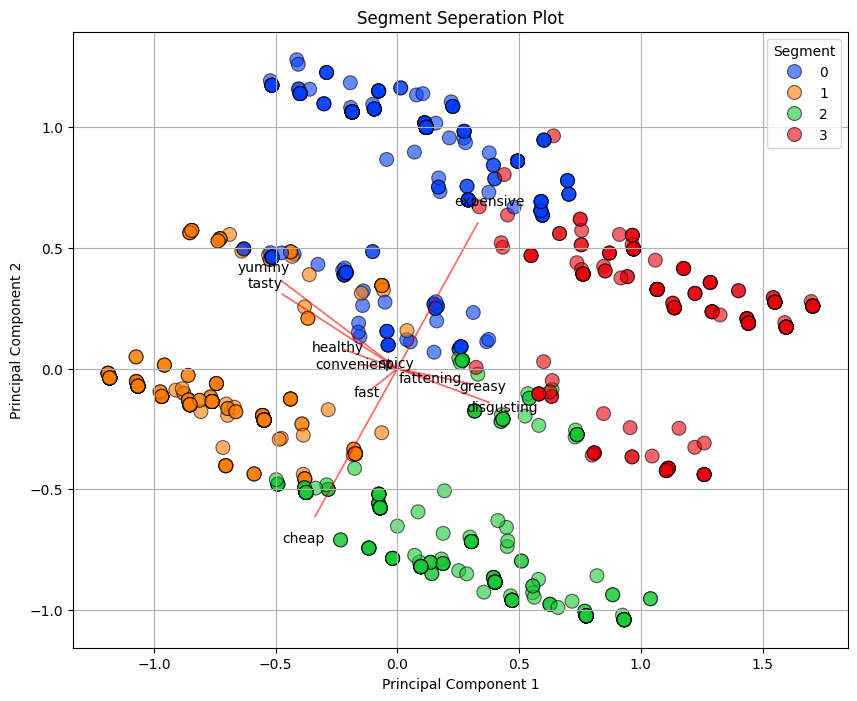

In [ ]:
pc_df['Segment'] = segment_labels
# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pc_df, hue = 'Segment', palette = 'bright', s = 100, edgecolor = 'k',alpha = 0.6)

# Add projection axes (loadings)
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x * 1.15, y * 1.15, df_binary.columns[i], color='black', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Seperation Plot')
plt.grid()
plt.show()

Like     -4  -3  -2  -1   0  +1  +2   +3   +4
Segment                                      
0         2   6   6   9  34  45  64   71   50
1         3   0   5   7  32  45  76  134  107
2        38  36  30  30  67  48  40   16    3
3        28  31  18  12  36  14   7    8    0


<Figure size 1000x800 with 0 Axes>

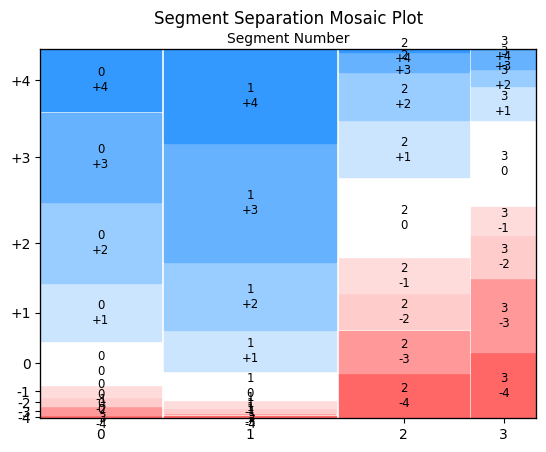

In [ ]:
# Define the desired sequence of 'Like' categories
like_categories = ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', 'i love it!+5']



# Add the segment labels to the original dataframe
df['Segment'] = segment_labels

# Reorder the 'Like' categories
df['Like'] = pd.Categorical(df['Like'], categories=like_categories, ordered=True)

# Cross-tabulate segment membership with the 'Like' variable
crosstab = pd.crosstab(pc_df['Segment'], df['Like'])
print(crosstab)

# Define the color mapping based on the 'Like' scale
color_map = {
    '+1': '#CCE5FF',  # Lightest blue for +1
    '+2': '#99CCFF',  # Very pale blue for +2
    '+3': '#66B2FF',  # Pale blue for +3
    '+4': '#3399FF',  # Less intense blue for +4
    '+5': '#0000FF',  # Blue for +5
    '-1': '#FFDCDC',  # Lightest red for -1
    '-2': '#FFCCCC',  # Very pale red for -2
    '-3': '#FF9999',  # Pale red for -3
    '-4': '#FF6666',  # Less intense red for -4
    '-5': '#FF0000',  # Red for -5
    '0': '#FFFFFF',   # White for 0
    'I hate it!-5': '#FF0000',  # Red for I hate it!-5
    'I love it!+5': '#0000FF'   # Blue for I love it!+5
}

# Create a dictionary for colors based on the 'Like' scale
props = {(str(row), str(col)): {'color': color_map.get(str(col), '#FFFFFF')} for row in crosstab.index for col in crosstab.columns}

# Convert the DataFrame to a format compatible with the mosaic function
mosaic_data = {(str(row), str(col)): crosstab.at[row, col] for row in crosstab.index for col in crosstab.columns}

# Generate the mosaic plot
plt.figure(figsize=(10, 8))
mosaic(mosaic_data, properties=props)
plt.xlabel('Segment Number')
plt.ylabel('Like')
plt.title('Segment Separation Mosaic Plot')
plt.show()

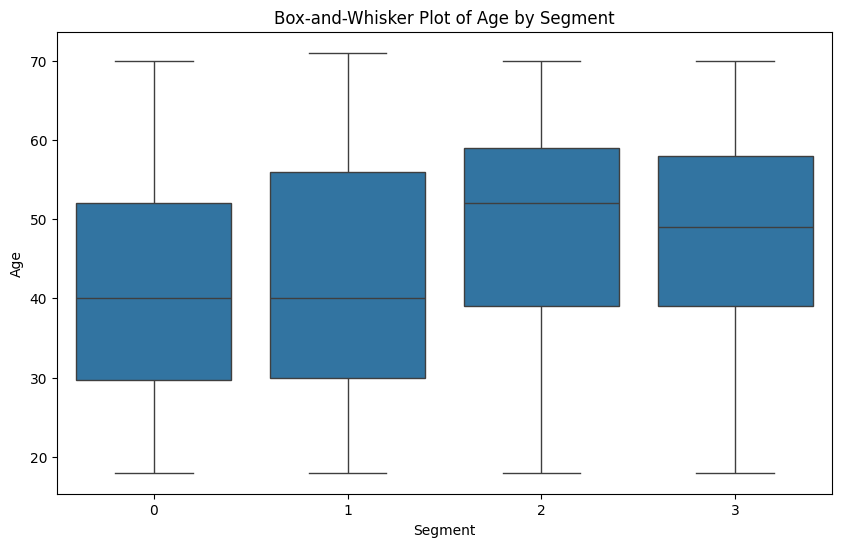

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=pc_df['Segment'], y=df['Age'])
plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('Box-and-Whisker Plot of Age by Segment')
plt.show()

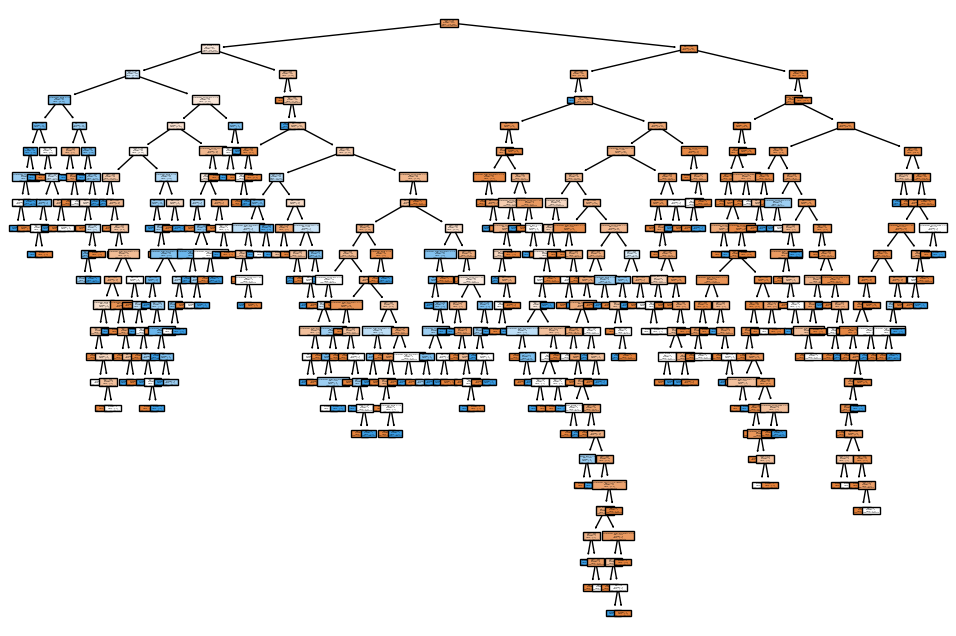

In [ ]:
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Define the independent variables (descriptor variables)
X = df[['Like.n','Age', 'VisitFrequency', 'Gender']]

# Convert categorical variables into one-hot encoded representation
X_encoded = pd.get_dummies(X, columns=['VisitFrequency', 'Gender'])


# Define the dependent variable (segment 3 membership)
y = (pc_df['Segment'] == 3).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform both the training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit the decision tree classifier
tree_model.fit(X_train_imputed, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X_encoded.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.show()

In [ ]:
print(merged_df.columns)

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'Segment_x', 'yummy', 'convenient', 'spicy', 'fattening',
       'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy',
       'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender', 'Like.n',
       'Segment_y', 'Like_numeric', 'VisitFrequency_numeric'],
      dtype='object')


In [ ]:
# Define a mapping of frequency intervals to numerical values
frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Once a month': 2,
    'Once a week': 3,
    'More than once a week': 4,
    'Every three months': 5
    # Add more intervals as needed
}

# Map the frequency intervals to numerical values
merged_df['VisitFrequency_numeric'] = merged_df['VisitFrequency'].map(frequency_mapping)

# Calculate the mean visit frequency for each segment
visit = merged_df.groupby('Segment_x')['VisitFrequency_numeric'].mean()

# Print the result
print(visit)

Segment_x
0    2.906627
1    2.933723
2    2.250000
3    1.934426
Name: VisitFrequency_numeric, dtype: float64


In [ ]:
# Calculate the mean 'Like.n' score for each segment
like = merged_df.groupby('Segment_x')['Like.n'].mean()

# Print the result
print(like)

Segment_x
0   -0.824561
1   -0.617021
2   -1.741294
3   -2.024000
Name: Like.n, dtype: float64


In [ ]:
# Calculate the proportion of females in each segment
female = df.groupby(pc_df['Segment'])['Gender'].apply(lambda x: (x == 'Female').mean())

# Print the result
print(female)

Segment
0    0.496988
1    0.602339
2    0.582418
3    0.418033
Name: Gender, dtype: float64


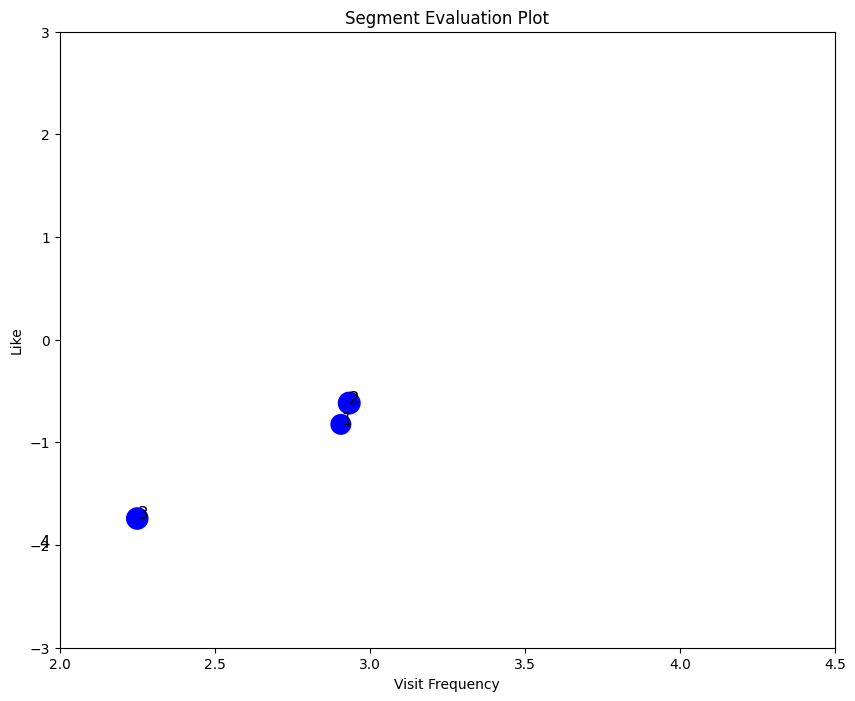

In [ ]:
# Define the values for visit, like, and female
visit_values = visit.values
like_values = like.values
female_values = female.values

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the points
plt.scatter(visit_values, like_values, s=400 * female_values, label='Segment', color='blue')

# Set the limits for the axes
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add labels for each point
for i, (x, y) in enumerate(zip(visit_values, like_values)):
    plt.text(x, y, str(i + 1), fontsize=12)

# Add labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Segment Evaluation Plot')

# Show the plot
plt.show()